In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from tensorflow import keras

from sklearn.model_selection import train_test_split

In [2]:
import cv2
import os

In [3]:
df=tf.keras.utils.image_dataset_from_directory(
    'images for phrases',
    image_size=(256, 256),
    shuffle=True,
    label_mode='int')

Found 1760 files belonging to 45 classes.


In [4]:
class_names = df.class_names
print(class_names)

['.ipynb_checkpoints', 'again', 'agree', 'answer', 'attendance', 'book', 'break', 'careful', 'change', 'chat', 'congratulations', 'email', 'file', 'good morning', 'happy birthday', 'home', 'how are you', 'hungry', 'i need help', 'join', 'keepsmile', 'meet', 'mistake', 'open', 'opinion', 'pass', 'please', 'practice', 'pressure', 'problem', 'questions', 'remember', 'seat', 'shift', 'sick', 'stop', 'sun', 'team', 'thirsty', 'this', 'together', 'understand', 'wait', 'where', 'write']


In [5]:
X=[]
y=[]

for images, labels in df:
    X.append(images.numpy())                    
    y.append(labels.numpy().astype('int32'))


X = np.concatenate(X)
y = np.concatenate(y)

In [6]:
X.shape

(1760, 256, 256, 3)

In [7]:
y.shape

(1760,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape  

(1408, 256, 256, 3)

In [11]:
y_train.shape

(1408,)

In [12]:
X_test.shape

(352, 256, 256, 3)

In [13]:
y_test.shape

(352,)

In [14]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

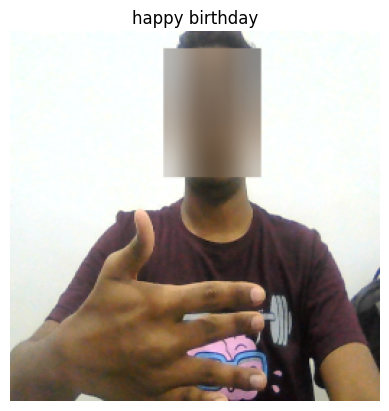

In [15]:
plt.imshow(X_train[1])
plt.title(class_names[y_train[1].item()])
plt.axis('off')
plt.show()

In [18]:
CNN=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=[3,3],activation='relu',input_shape=(256,256,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=[3,3],activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=[3,3],activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(45,activation='softmax')
    
])

CNN.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [29]:
history = CNN.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=6,
    batch_size=16
)


Epoch 1/6
71/71 [==============================] - 258s 4s/step - loss: 0.1299 - accuracy: 0.9689 - val_loss: 0.0164 - val_accuracy: 0.9965
Epoch 2/6
71/71 [==============================] - 207s 3s/step - loss: 0.1097 - accuracy: 0.9716 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3/6
71/71 [==============================] - 207s 3s/step - loss: 0.0894 - accuracy: 0.9778 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/6
71/71 [==============================] - 183s 3s/step - loss: 0.0685 - accuracy: 0.9769 - val_loss: 0.0041 - val_accuracy: 0.9965
Epoch 5/6
71/71 [==============================] - 183s 3s/step - loss: 0.0728 - accuracy: 0.9778 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/6
71/71 [==============================] - 172s 2s/step - loss: 0.0519 - accuracy: 0.9822 - val_loss: 0.0194 - val_accuracy: 0.9929


In [20]:
CNN.evaluate(X_test,y_test)

11/11 [==============================] - 12s 929ms/step - loss: 0.0389 - accuracy: 0.9943


[0.03893434628844261, 0.9943181872367859]

In [1]:
CNN.save('Two_way_Communication_system_model.h5') 


NameError: name 'CNN' is not defined

In [22]:
loaded_CNN = tf.keras.models.load_model('Two_way_Communication_system_model.h5')  


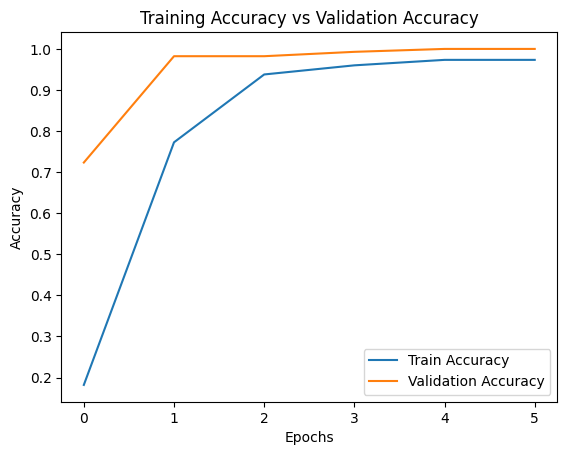

In [23]:
plt.plot(history.history['accuracy'],label=['Train Accuracy'])
plt.plot(history.history['val_accuracy'],label=['Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

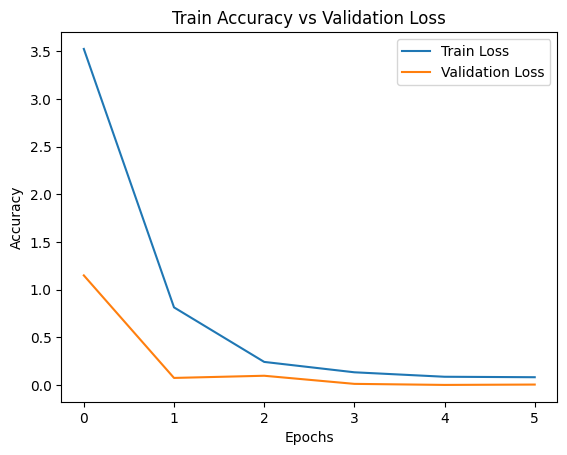

In [24]:
plt.plot(history.history['loss'],label=['Train Loss'])
plt.plot(history.history['val_loss'],label=['Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train Accuracy vs Validation Loss')
plt.show()

In [25]:
print(class_names[y_train[10]])

stop


In [26]:
image_size=256
channel=3

In [27]:
class_names=['again', 'agree', 'answer', 'attendance', 'book', 'break', 'careful', 'change',
             'chat', 'congratulations', 'email', 'file', 'good morning','happy birthday',
             'home', 'how are you', 'hungry', 'i need help', 'join', 'keepsmile', 'meet', 
             'mistake', 'open', 'opinion', 'pass', 'please', 'practice', 'pressure', 'problem',
             'questions', 'remember', 'seat', 'shift', 'sick', 'stop', 'sun', 'team', 'thirsty', 'this',
             'together', 'understand', 'wait', 'where', 'write']

In [ ]:
# Start webcam
video = cv2.VideoCapture(0)

sentence = []  # to build a sentence
previous_word = ""  # to avoid repetition

while True:
    ret, frame = video.read()
    if not ret:
        break

    # Resize and preprocess the frame
    resized = cv2.resize(frame, (256, 256))
    normalized = resized.astype('float32') / 255.0
    input_data = np.reshape(normalized, (1, 256, 256, 3))  # 4D shape
    # Flattened for Dense input

    # Predict
    predictions = loaded_CNN.predict(input_data)
    predicted_index = np.argmax(predictions)
    predicted_label = class_names[predicted_index]

    # Avoid repeating the same word again and again
    if predicted_label != previous_word:
        sentence.append(predicted_label)
        previous_word = predicted_label

    key = cv2.waitKey(1)
    if key == ord('q'):  # Press 'q' to quit
        break
    elif key == ord('r'):  # Press 'r' to reset the sentence
        sentence = []
        previous_word = ""

video.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 81ms/step
